# **k Means Clustering - Practical Implementation**

In [19]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

In [18]:
# creating blobls
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)

We will ignore y

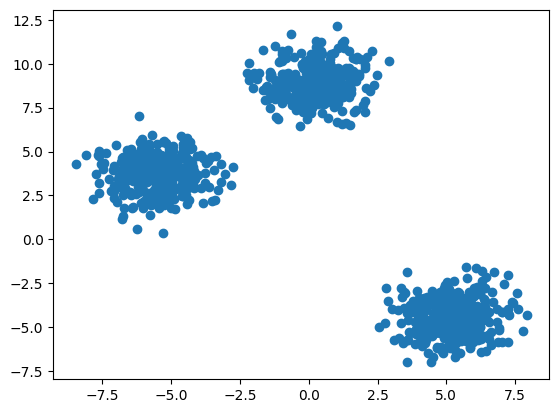

In [20]:
plt.scatter(X[:, 0], X[:, 1])

**Train Test Split**

In [22]:
# importing train_test_split
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## **K Means Implementation**

In [24]:
# importing K Means
from sklearn.cluster import KMeans

### **Manual Techniue to find Optimal value of K**

In [25]:
## Elbow Method
wcss = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

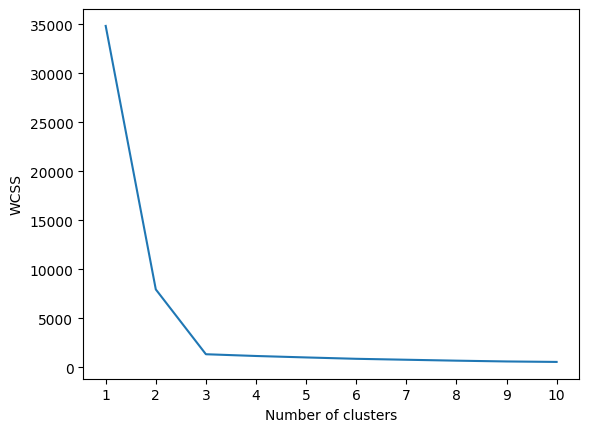

In [28]:
# visualizing for K value
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

**K = 3**

In [30]:
# implementing model
kmeans = KMeans(n_clusters=3, init='k-means++')
y_labels = kmeans.fit_predict(X_train)

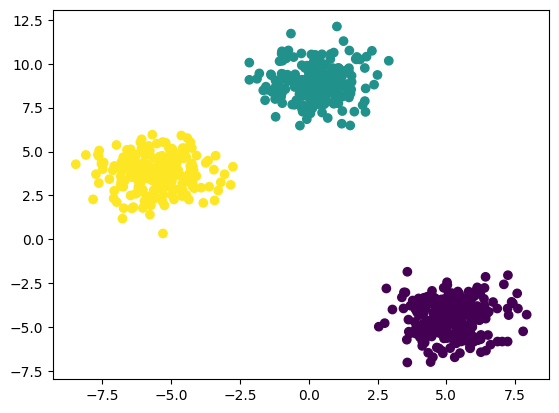

In [31]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_labels)

**Testing**

In [32]:
y_test_labels = kmeans.predict(X_test)

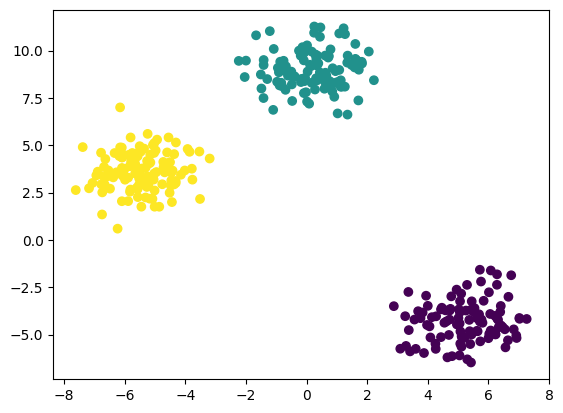

In [33]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_labels)

### **Automtic technique to find Optimal value of K**

In [34]:
# installing Kneed library
!pip install kneed

In [35]:
# importing KneeLocator
from kneed import KneeLocator

In [40]:
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
kl.elbow

3

**Testing**

In [41]:
# importing silhouette score
from sklearn.metrics import silhouette_score

In [51]:
silhouette_coefficients = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(X_train)
  score = silhouette_score(X_train, kmeans.labels_)
  silhouette_coefficients.append(score)

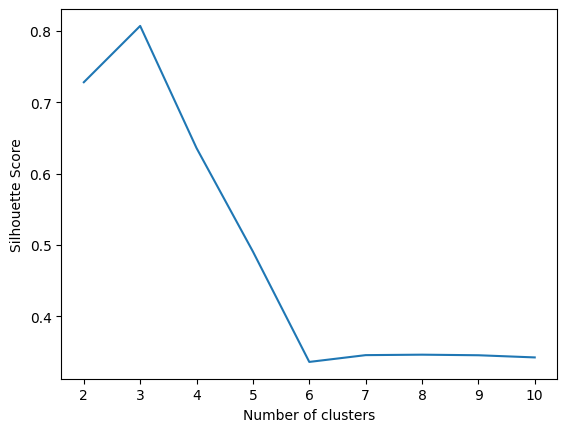

In [52]:
# plotting silhouette score
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()